## Imports

In [120]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

## Image Loading and Virtualization

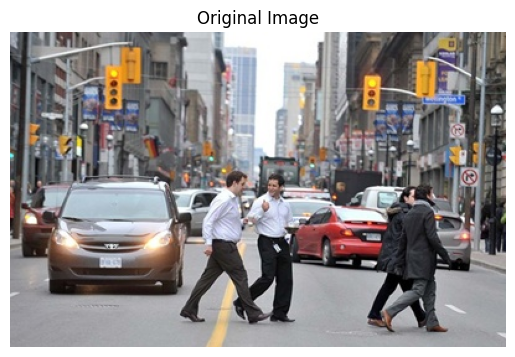

In [121]:
#imread
image = cv2.imread('image.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#visualization with matplotlib 
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

## HOGDescriptor

In [122]:
# Create a HOGDescriptor object and initialize it by people or pedestrian detector, then implement object detection
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.05, hitThreshold=0.5)
threshold = 0.5
filtered_rects = []
for i, (x, y, w, h) in enumerate(rects):
    if weights[i] > threshold:
        filtered_rects.append((x, y, w, h))
#after finding picture's people, draw their bounding boxes on the image
for (x, y, w, h) in filtered_rects:
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 1)

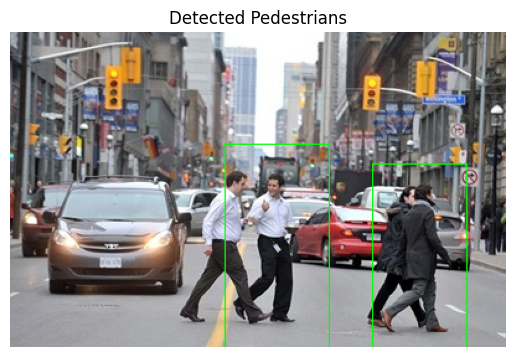

In [123]:
#plot and save the output
cv2.imwrite('detected pedestrians.jpg', cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
plt.imshow(image_rgb)
plt.title('Detected Pedestrians')
plt.axis('off')
plt.show()

## Image Compressions and Grayscale

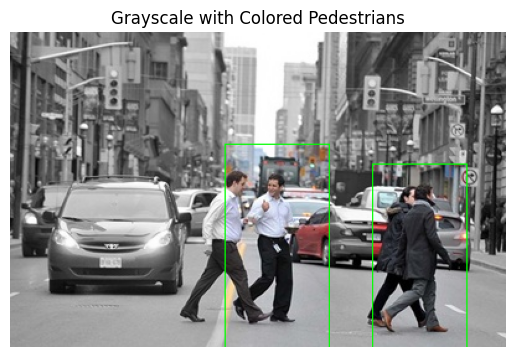

In [124]:
#grayscale picture except for the parts where there is a person
mask = np.zeros(image.shape[:2], dtype=np.uint8)
for (x, y, w, h) in filtered_rects:
    mask[y:y+h+1, x:x+w+1] = 1
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image_rgb = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB)
combined_image = image_rgb.copy()
combined_image[mask == 0] = gray_image_rgb[mask == 0]
#plot and save the output
cv2.imwrite('grayscale with colored pedestrians.jpg', cv2.cvtColor(combined_image, cv2.COLOR_RGB2BGR))
plt.imshow(combined_image)
plt.title('Grayscale with Colored Pedestrians')
plt.axis('off')
plt.show()

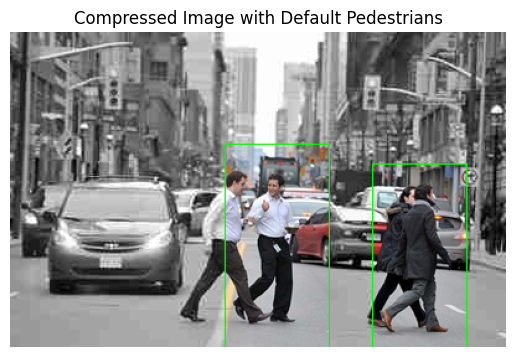

In [125]:
#implement huffman or any other image compressions  algorithm on the picture except for the parts where there is a person
compressed_image = Image.fromarray(cv2.cvtColor(gray_image, cv2.COLOR_GRAY2RGB))
compressed_image.save('compressed image.jpg', optimize=True, quality=20)
compressed_image = cv2.imread('compressed image.jpg')
compressed_image_rgb = cv2.cvtColor(compressed_image, cv2.COLOR_BGR2RGB)
for (x, y, w, h) in filtered_rects:
    compressed_image_rgb[y:y+h+1, x:x+w+1] = image_rgb[y:y+h+1, x:x+w+1]
#plot and save the output
cv2.imwrite('compressed image with defualt pedestrians.jpg', cv2.cvtColor(compressed_image_rgb, cv2.COLOR_RGB2BGR))
plt.imshow(compressed_image_rgb)
plt.title('Compressed Image with Default Pedestrians')
plt.axis('off')
plt.show()